In [6]:
!pip3 install beautifulsoup4 --quiet
!pip3 install lxml --quiet
!pip3 install requests --quiet
!pip3 install nltk --quiet
!pip3 install spacy --quiet
!pip3 install seab
!python3 -m spacy download en_core_web_sm --quiet
!pip3 install imblearn --quiet

Python(87775) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Python(87776) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Python(87777) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Python(87783) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Python(87784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Python(87785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


ERROR: Could not find a version that satisfies the requirement seab (from versions: none)
ERROR: No matching distribution found for seab

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


Python(87786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Python(87788) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import ssl
from nltk.stem.snowball import SnowballStemmer
import nltk

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
nltk.download('punkt')

After the following experiminets, we found Penalised SVM and Logistic Regression to be the best models
Next we will try to tune the hyperparameters of these models to see if we can improve the performance
We will use GridSearchCV to tune the hyperparameters


## Extracting Categories from File Storage Folder Names

Utilizing the folder names of the file storage, we can successfully extract the categories for each article in the Newsgroup20 dataset. Once the extraction is complete, we can proceed to drop the filename since it is no longer necessary for our analysis.

### Addressing Imbalance in Average Text Length by Topic

Upon examining the average text length of each article relative to its topic, we might identify an imbalance. It is crucial to address this imbalance, aligning with our efforts to handle class imbalances between the different categories. This ensures a more equitable representation of topics in our dataset, contributing to a more robust and unbiased analysis.

In [7]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

news = fetch_20newsgroups(subset='all') # subset='all' means we want all the data ( train + test)
prefix = "/home/codespace/scikit_learn_data/20news_home/"
df = pd.DataFrame({'text': news.data, 'category': news.target, 'filename': news.filenames})
# removing the prefix from the filename
df['topic'] = df['filename'].apply(lambda x: x.split("/")[-2])
# dropping the filename column
df.drop(columns=['filename'], inplace=True)

df[df['category'] == 10].head()



,text,category,topic
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10,rec.sport.hockey
7,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey
8,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey
24,From: cs902043@ariel.yorku.ca (SHAWN LUDDINGTO...,10,rec.sport.hockey
44,From: gritter@cs.purdue.edu (Carl Gritter)\nSu...,10,rec.sport.hockey


In [8]:
# category where topic is comp.sys.ibm.pc.hardware

df[df['topic'] == 'comp.sys.ibm.pc.hardware'].head()



,text,category,topic
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3,comp.sys.ibm.pc.hardware
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3,comp.sys.ibm.pc.hardware
70,From: dwayne@stratsft.uucp (Dwayne Bailey)\nSu...,3,comp.sys.ibm.pc.hardware
95,From: jcmorris@mbunix.mitre.org (Morris)\nSubj...,3,comp.sys.ibm.pc.hardware
120,"From: ""Mohammad Al-Ansari"" <alansari@mango.ucs...",3,comp.sys.ibm.pc.hardware


In [9]:
# print a random text
print(df['topic'][0])
print(df['text'][0])


rec.sport.hockey
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [10]:
# Preprocessing code


def strip_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def strip_numeric(text):
    return re.sub(r'\d+', '', text)

def strip_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

def strip_multiple_whitespaces(text):
    return re.sub(r'\s+', ' ', text).strip()

def remove_newline(text):
    return text.replace('\n', '')

def transform_to_lower(text):
    return text.lower()

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

def remove_single_char(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if len(word) > 1]
    return ' '.join(filtered_words)

def stem_text(text):
    stemmer = SnowballStemmer("english")
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def clean_text(text):
    if text is None:
        return ""
    text = strip_tags(text)
    text = strip_numeric(text)
    text = strip_punctuation(text)
    text = remove_newline(text)
    text = strip_multiple_whitespaces(text)
    text = transform_to_lower(text)
    text = remove_stopwords(text)
    text = remove_single_char(text)
    text = stem_text(text)
    return text

# check if cleaned_data.csv exists
import os

df['clean_text'] = df['text'].apply(clean_text)
df.to_csv("cleaned_data.csv", index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anushkrishnav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anushkrishnav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/var/folders/1s/d6cby_d90fsfb94qvy0p0ttm0000gn/T/ipykernel_54437/2730390880.py:23: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [11]:
df.head()


,text,category,topic,clean_text
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10,rec.sport.hockey,mamatha devineni ratnam subject pen fan reacti...
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3,comp.sys.ibm.pc.hardware,mblawsonmidwayecnuoknoredu matthew lawsonsubje...
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17,talk.politics.mideast,hilmierdsvsus hilmi erensubject armenia say co...
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3,comp.sys.ibm.pc.hardware,guydaustinibmcom guy dawsonsubject ide vs scsi...
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4,comp.sys.mac.hardware,alexand samuel mcdiarmid subject driver organ ...


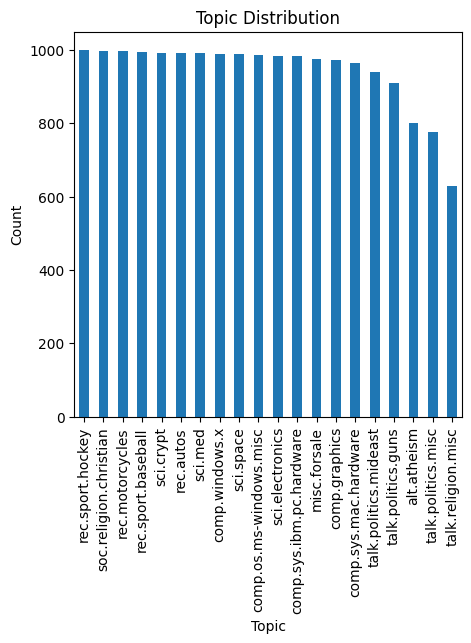

In [12]:
# topic distribution
df['topic'].value_counts().plot(kind='bar', figsize=(5, 5))
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()


## Data Splitting for Preprocessing

While the preprocessing is ongoing, it's essential to split the data into training and testing sets. This step is crucial to prevent data leakage.

### Why Data Splitting?

**Data Preprocessing Leakage:**
Data leakage can happen when information from the test set is unintentionally incorporated into preprocessing steps, like scaling or normalization. This could result in overly optimistic performance metrics during training but might lead to poor generalization performance on new, unseen data. To avoid this, we split the data early in the process.



In [13]:
df

,text,category,topic,clean_text
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10,rec.sport.hockey,mamatha devineni ratnam subject pen fan reacti...
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3,comp.sys.ibm.pc.hardware,mblawsonmidwayecnuoknoredu matthew lawsonsubje...
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17,talk.politics.mideast,hilmierdsvsus hilmi erensubject armenia say co...
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3,comp.sys.ibm.pc.hardware,guydaustinibmcom guy dawsonsubject ide vs scsi...
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4,comp.sys.mac.hardware,alexand samuel mcdiarmid subject driver organ ...
...,...,...,...,...
18841,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,sci.med,jimzisfeinfactorycom jim zisfein subject migra...
18842,From: rdell@cbnewsf.cb.att.com (richard.b.dell...,12,sci.electronics,rdellcbnewsfcbattcom richardbdellsubject quest...
18843,From: westes@netcom.com (Will Estes)\nSubject:...,3,comp.sys.ibm.pc.hardware,westesnetcomcom estessubject mount cpu cooler ...
18844,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,comp.graphics,stevehcrlgw steven collinssubject sphere point...


In [14]:
# making a train and test set
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['topic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['topic'])

# check if train and test set are balanced
print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)



Train set:  (15076,) (15076,)
Test set:  (3770,) (3770,)


In [15]:
X_train

14896    alexvusevanderbiltedu alexand zijdenbossubject...
9716     malexanacsokstateedu alexand michaelsubject ba...
17444    idrrigelcspdxedu ian romanicksubject rumour ar...
10790    khohuscedu oliv muotosubject sale silverlin ha...
2563     dale_adamsgatewayqmapplecom dale adamssubject ...
                               ...                        
1622     giffordoasysdtnavymil barbara giffordsubject m...
18046    serazumauucp serdar argicsubject destroy ethni...
14142    kjenksgothamcityjscnasagovsubject space food s...
6756     yerazuniscthuluenetdeccomsubject hard drive se...
11937    bressleriftccucaboeingcom rick bresslersubject...
Name: clean_text, Length: 15076, dtype: object


After Experiments, And taking into the not so significant class imbalance, we decided to not use any sampling techniques and use the original data as it is.

In [16]:
# # oversample the X_train
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train.values.reshape(-1, 1), y_train)
# X_train = pd.DataFrame(X_train, columns=['clean_text'])
# y_train = pd.DataFrame(y_train, columns=['category'])
# train_df = pd.concat([X_train, y_train], axis=1)
# X_train = train_df['clean_text']
# y_train = train_df['category']
# X_train


In [17]:
# # Undersampling
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(random_state=42)
# X_train, y_train = rus.fit_resample(X_train.values.reshape(-1, 1), y_train)
# X_train = pd.DataFrame(X_train, columns=['clean_text'])
# y_train = pd.DataFrame(y_train, columns=['category'])
# train_df = pd.concat([X_train, y_train], axis=1)
# X_train = train_df['clean_text']
# y_train = train_df['category']
# X_train

In [18]:


# # topic distribution
# train_df['category'].value_counts().plot(kind='bar', figsize=(10, 5))
# plt.title('Topic Distribution')
# plt.xlabel('Topic')
# plt.ylabel('Count')
# plt.show()


In [19]:
# save the data
# train_df.to_csv("balanced_data.csv", index=False)




## Sparse Matrix for Text Classification

Based on the observations from the [Text Complexity Analysis](03_a_text_complexity.ipynb), we can conclude that the Newsgroup20 dataset is a high-dimensional dataset with lot of unique words and most of these words are sparse in nature. Hence, we can use a sparse matrix representation for the dataset.

1. **Text Data Characteristics:**
   - Text data is high-dimensional, with a large number of unique words (features). Most of these features have a sparse presence in any given document. A sparse matrix efficiently represents this characteristic by only storing the non-zero elements.

2. **Efficient Memory Usage:**
   - Text datasets result in large matrices where the majority of elements are zero (indicating the absence of a particular word). A sparse matrix format optimizes memory usage by only storing and processing the non-zero elements, significantly reducing the computational burden.

3. **Computation Speed:**
   - Algorithms used in text classification, such as those involving Support Vector Machines (SVM) or Random Forests, can be computationally intensive. A sparse matrix format accelerates these computations by skipping zero-value operations, leading to faster training and prediction times.

### Post Train-Test Split Implementation:

   - Performing the sparse matrix conversion after the train-test split is crucial to prevent data leakage. If the transformation is applied to the entire dataset before splitting, information from the test set might inadvertently influence the creation of the sparse matrix during training, compromising the model's ability to generalize to new, unseen data.
.

Why “TF-IDF” (Term Frequency — Inverse Document Frequency) ?


In [20]:
# creating a sparse matrix
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word',  max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# check the shape of the sparse matrix
print("Train set: ", X_train_vectorized.shape)
print("Test set: ", X_test_vectorized.shape)




Train set:  (15076, 5000)
Test set:  (3770, 5000)


In [21]:
X_train = X_train_vectorized
X_test = X_test_vectorized


SciKit Learn's Logistic Regression model for classifying data has a built-in option for class_weight which allows you to explain to your model that some classes should be considered more strongly than others. The easiest way to balance from there is to just apply class_weight='balanced' - the Logistic Regression model will automatically know to assign a weight inverse to the frequency of that class. 

Accuracy:  0.8673740053050398


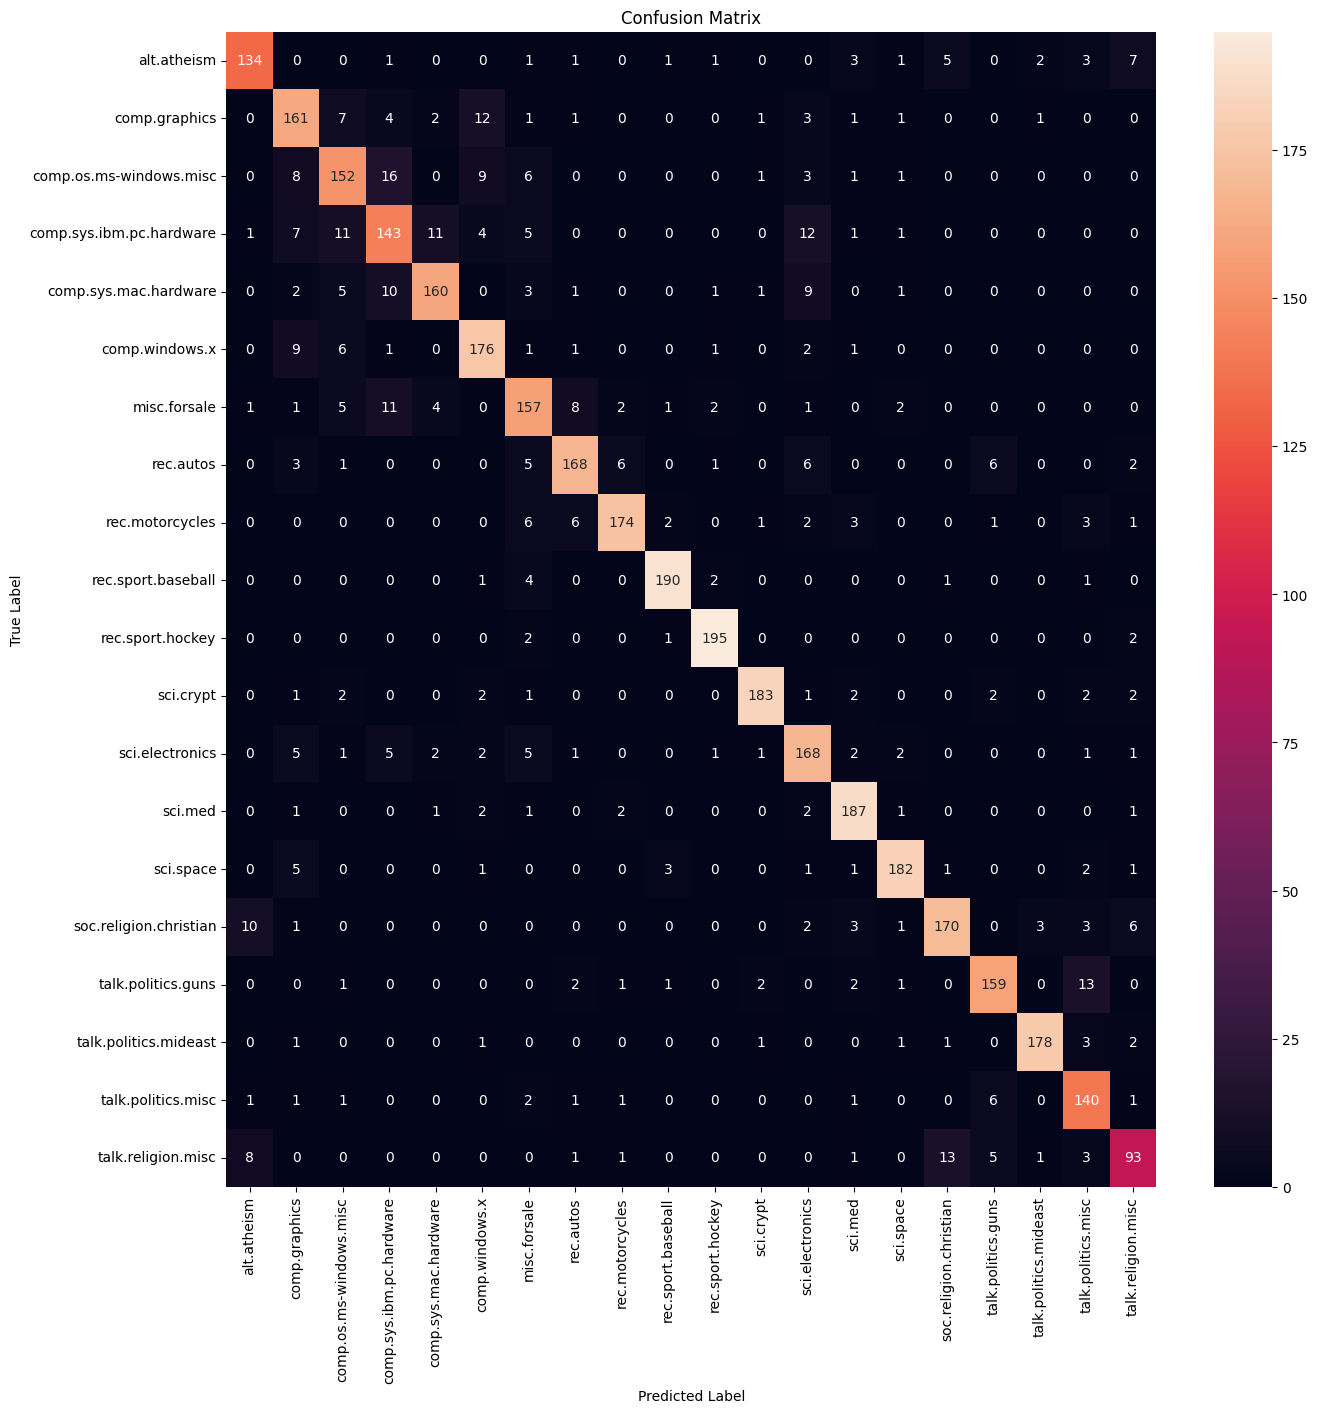

In [22]:
# Classification using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  confusion_matrix

logreg = LogisticRegression(multi_class='multinomial', max_iter=9000, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# print the accuracy score
print("Accuracy: ", logreg.score(X_test, y_test))

# heatmap
import seaborn as sns
target_names = news.target_names
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [23]:
from sklearn.metrics import classification_report
# f1 score
from sklearn.metrics import f1_score
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))



print(classification_report(y_test, y_pred, target_names=news.target_names))

F1 Score:  0.8674388729565374
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.84      0.85       160
           comp.graphics       0.78      0.83      0.80       195
 comp.os.ms-windows.misc       0.79      0.77      0.78       197
comp.sys.ibm.pc.hardware       0.75      0.73      0.74       196
   comp.sys.mac.hardware       0.89      0.83      0.86       193
          comp.windows.x       0.84      0.89      0.86       198
            misc.forsale       0.79      0.81      0.79       195
               rec.autos       0.88      0.85      0.86       198
         rec.motorcycles       0.93      0.87      0.90       199
      rec.sport.baseball       0.95      0.95      0.95       199
        rec.sport.hockey       0.96      0.97      0.97       200
               sci.crypt       0.96      0.92      0.94       198
         sci.electronics       0.79      0.85      0.82       197
                 sci.med       0.89      0.94

Accuracy:  0.8793103448275862
                          precision    recall  f1-score   support

             alt.atheism       0.91      0.84      0.87       160
           comp.graphics       0.71      0.84      0.77       195
 comp.os.ms-windows.misc       0.81      0.80      0.81       197
comp.sys.ibm.pc.hardware       0.76      0.76      0.76       196
   comp.sys.mac.hardware       0.88      0.83      0.86       193
          comp.windows.x       0.86      0.87      0.87       198
            misc.forsale       0.85      0.85      0.85       195
               rec.autos       0.88      0.90      0.89       198
         rec.motorcycles       0.96      0.90      0.93       199
      rec.sport.baseball       0.95      0.94      0.95       199
        rec.sport.hockey       0.97      0.95      0.96       200
               sci.crypt       0.97      0.94      0.96       198
         sci.electronics       0.81      0.85      0.83       197
                 sci.med       0.87      0.93

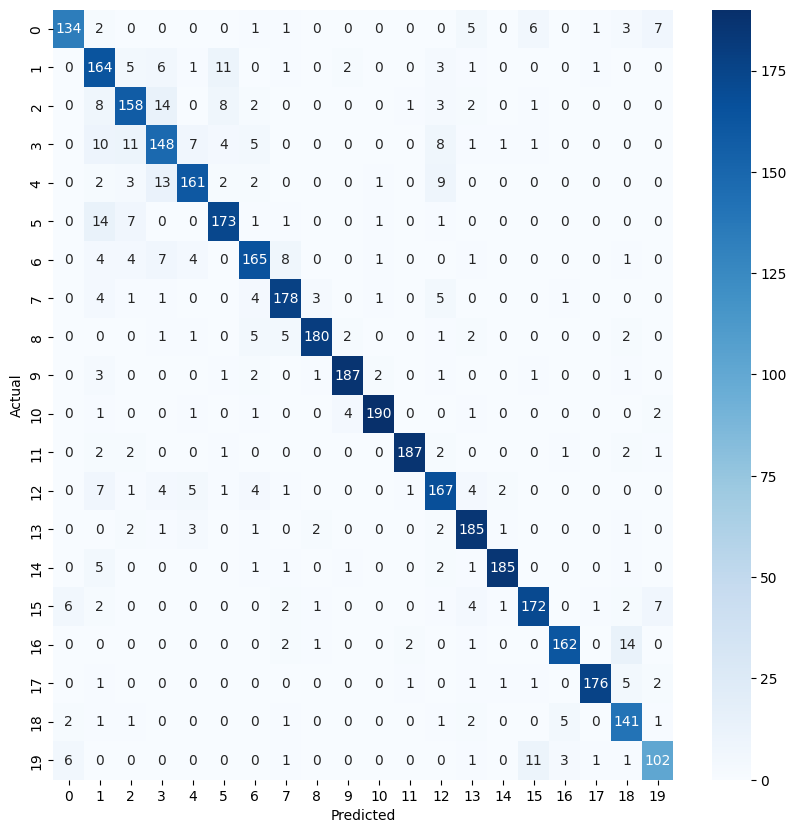

In [24]:
# Classification using Penalized SVM
from sklearn.svm import SVC

# balanced class weights
svc = SVC(kernel='linear', class_weight='balanced', C=1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# print the accuracy score
print("Accuracy: ", svc.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=news.target_names))


# heatmap
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [25]:
# Classification using Linear SVM
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, f1_score

# balanced class weights
lsvc = LinearSVC(class_weight='balanced', max_iter=9000)
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)

# print the f1 score
print("F1 Score: ", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred, target_names=news.target_names))



/Users/anushkrishnav/.local/share/virtualenvs/newsgroup-u5VajpjS/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


F1 Score:  0.8775150444569528
                          precision    recall  f1-score   support

             alt.atheism       0.91      0.86      0.88       160
           comp.graphics       0.78      0.82      0.80       195
 comp.os.ms-windows.misc       0.79      0.78      0.78       197
comp.sys.ibm.pc.hardware       0.74      0.73      0.73       196
   comp.sys.mac.hardware       0.86      0.84      0.85       193
          comp.windows.x       0.85      0.90      0.87       198
            misc.forsale       0.84      0.78      0.81       195
               rec.autos       0.89      0.89      0.89       198
         rec.motorcycles       0.93      0.92      0.93       199
      rec.sport.baseball       0.98      0.94      0.96       199
        rec.sport.hockey       0.95      0.97      0.96       200
               sci.crypt       0.94      0.94      0.94       198
         sci.electronics       0.83      0.87      0.85       197
                 sci.med       0.89      0.92

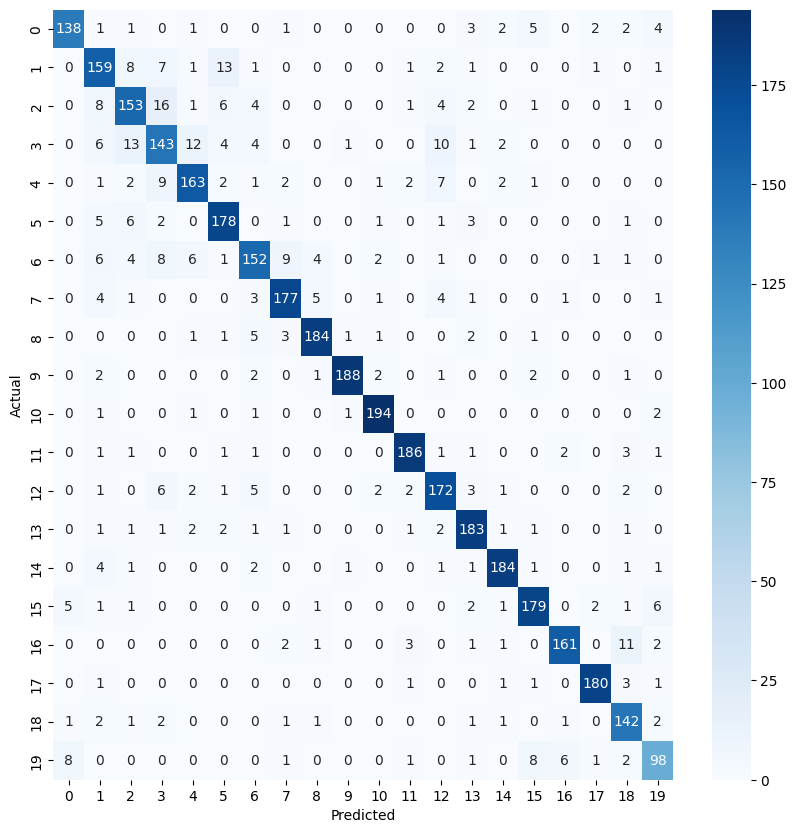

In [26]:
# heatmap
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [27]:
# Classification using Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# print the accuracy score
print("Accuracy: ", rf.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=news.target_names))


Accuracy:  0.8092838196286473
                          precision    recall  f1-score   support

             alt.atheism       0.87      0.73      0.80       160
           comp.graphics       0.67      0.73      0.70       195
 comp.os.ms-windows.misc       0.75      0.78      0.76       197
comp.sys.ibm.pc.hardware       0.67      0.73      0.70       196
   comp.sys.mac.hardware       0.85      0.80      0.82       193
          comp.windows.x       0.83      0.79      0.81       198
            misc.forsale       0.76      0.76      0.76       195
               rec.autos       0.81      0.82      0.81       198
         rec.motorcycles       0.89      0.83      0.86       199
      rec.sport.baseball       0.84      0.87      0.86       199
        rec.sport.hockey       0.92      0.94      0.93       200
               sci.crypt       0.91      0.93      0.92       198
         sci.electronics       0.71      0.73      0.72       197
                 sci.med       0.80      0.87

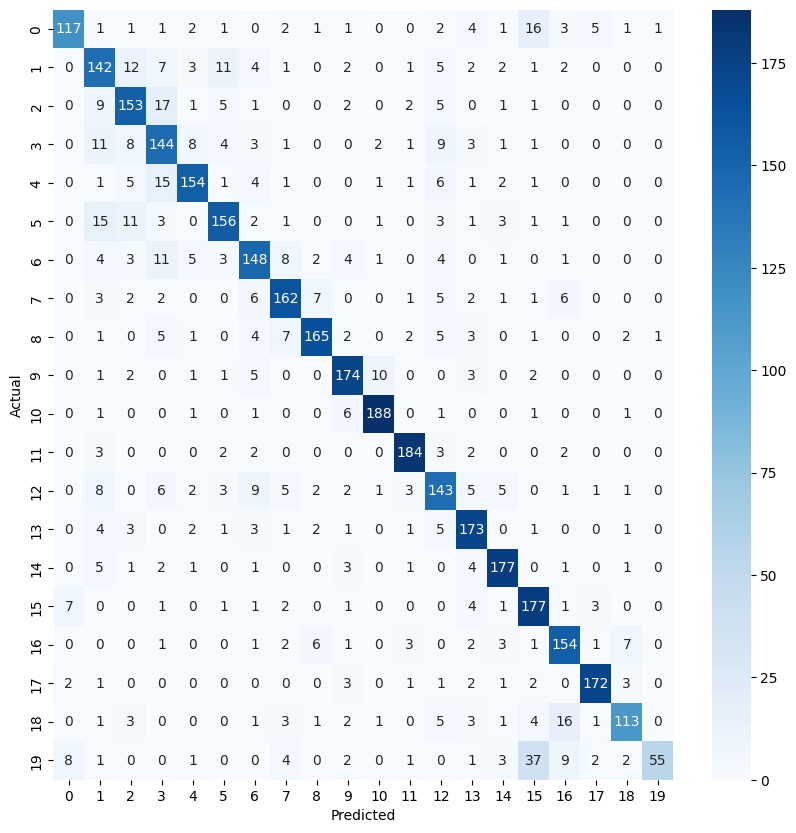

In [28]:
# heatmap
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [29]:
# naive bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# print the accuracy score
print("Accuracy: ", nb.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=news.target_names))


Accuracy:  0.846684350132626
                          precision    recall  f1-score   support

             alt.atheism       0.83      0.73      0.78       160
           comp.graphics       0.74      0.83      0.78       195
 comp.os.ms-windows.misc       0.78      0.80      0.79       197
comp.sys.ibm.pc.hardware       0.71      0.80      0.75       196
   comp.sys.mac.hardware       0.88      0.83      0.86       193
          comp.windows.x       0.84      0.88      0.86       198
            misc.forsale       0.86      0.71      0.78       195
               rec.autos       0.87      0.88      0.87       198
         rec.motorcycles       0.91      0.90      0.91       199
      rec.sport.baseball       0.95      0.95      0.95       199
        rec.sport.hockey       0.96      0.96      0.96       200
               sci.crypt       0.90      0.95      0.93       198
         sci.electronics       0.84      0.83      0.83       197
                 sci.med       0.92      0.92 

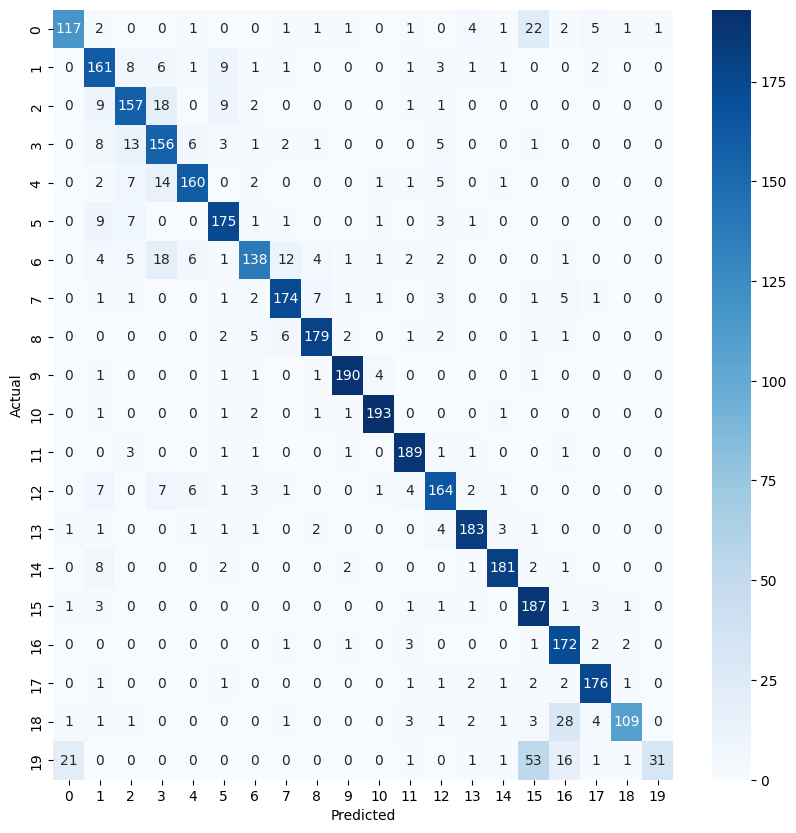

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [31]:
# Voting Classifier using Logistic Regression, LinearSVM and Random Forest
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('lr', logreg), ('lsvc', lsvc), ('rf', rf)], voting='hard')

vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

# print the accuracy score
print("Accuracy: ", vc.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=news.target_names))


/Users/anushkrishnav/.local/share/virtualenvs/newsgroup-u5VajpjS/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy:  0.8771883289124669
                          precision    recall  f1-score   support

             alt.atheism       0.87      0.86      0.87       160
           comp.graphics       0.73      0.84      0.78       195
 comp.os.ms-windows.misc       0.79      0.79      0.79       197
comp.sys.ibm.pc.hardware       0.73      0.74      0.74       196
   comp.sys.mac.hardware       0.88      0.83      0.86       193
          comp.windows.x       0.86      0.89      0.87       198
            misc.forsale       0.82      0.81      0.81       195
               rec.autos       0.90      0.87      0.88       198
         rec.motorcycles       0.95      0.88      0.91       199
      rec.sport.baseball       0.96      0.96      0.96       199
        rec.sport.hockey       0.96      0.97      0.97       200
               sci.crypt       0.96      0.93      0.95       198
         sci.electronics       0.82      0.86      0.84       197
                 sci.med       0.92      0.94

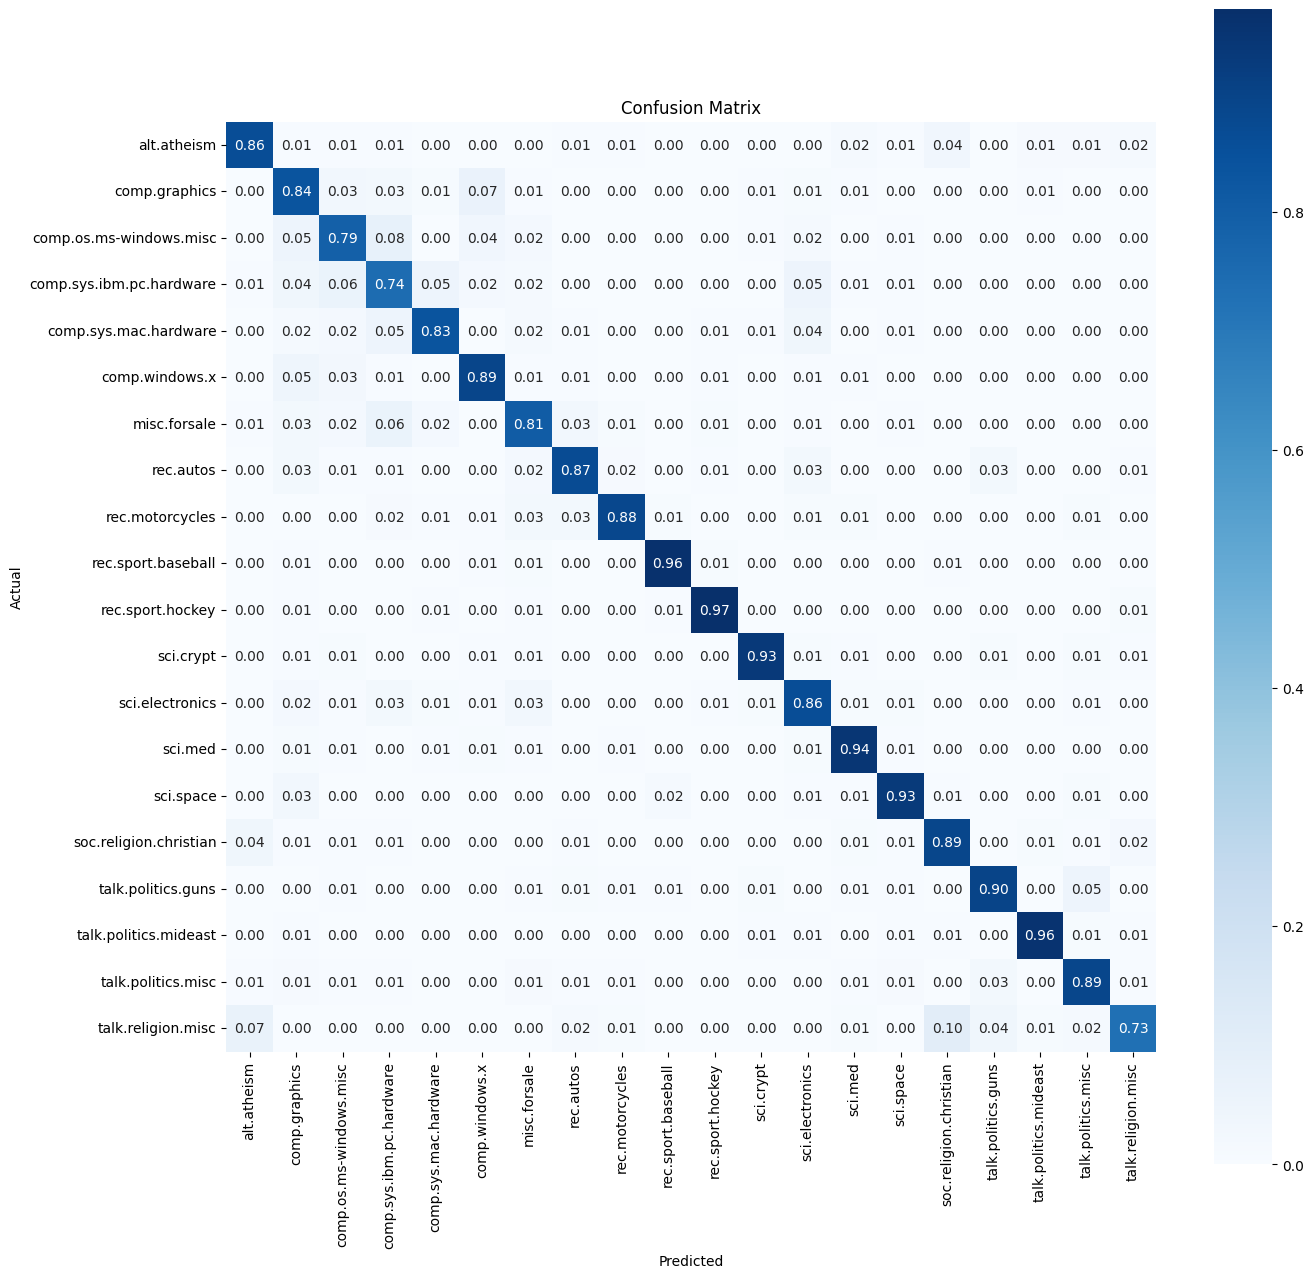

In [32]:
# heatmap
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, square=True, cmap='Blues', fmt='.2f', annot_kws={"size": 10},
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()



In [33]:
# grid search for logistic regression and linear svm
from sklearn.model_selection import GridSearchCV

# logistic regression
logreg = LogisticRegression(multi_class='multinomial', max_iter=9000)
param_grid = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set accuracy: {:.2f}".format(grid.score(X_test, y_test)))

# linear svm
lsvc = LinearSVC(max_iter=9000)
param_grid = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(lsvc, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set accuracy: {:.2f}".format(grid.score(X_test, y_test)))



Best cross-validation score: 0.86
Best parameters:  {'C': 10}
Test set accuracy: 0.88


/Users/anushkrishnav/.local/share/virtualenvs/newsgroup-u5VajpjS/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/anushkrishnav/.local/share/virtualenvs/newsgroup-u5VajpjS/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/anushkrishnav/.local/share/virtualenvs/newsgroup-u5VajpjS/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/anushkrishnav/.local/share/virtualenvs/newsgroup-u5VajpjS/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The d

Best cross-validation score: 0.86
Best parameters:  {'C': 1}
Test set accuracy: 0.88
